### Polinomial regression
Polinomial regression describes polynomial functions in contrast to linear one, which is more complex and describes nonlinear relationships between predictor and target feature. We will do a little play with some fake data as illustration.
PolynomialFeatures with degree three  for two features a and b adds not only $a^2$, $a^3$, $b^2$, $b^3$ but also $ab$, $a*b^2$, $a^2*b$. Some optimisation, like Akaike information criteria is needed to determine the smallest mean square error but in relation to the number of parameters, due to computational complexity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
m=300
x = 5 * np.random.rand(m) - 3
y = 10* x**3 + 8*x**2 + 3*x + 3 + 100*np.random.rand(m)

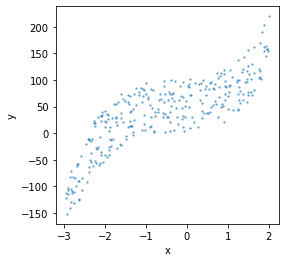

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, s=2, alpha =0.5)
plt.xlabel('x')
plt.ylabel('y');

In [4]:
# y_pred = lin_reg.coef_[0][0]*x**3 + lin_reg.coef_[0][2]*x**2 + lin_reg.coef_[0][1]*x + lin_reg.intercept_[0]

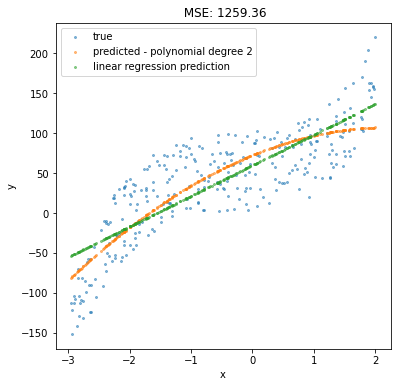

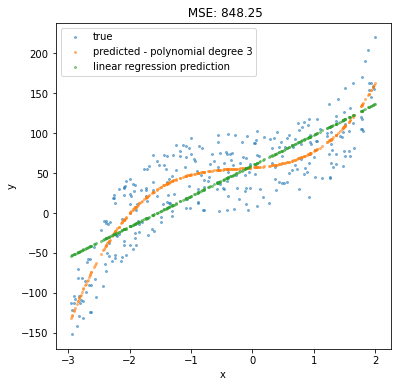

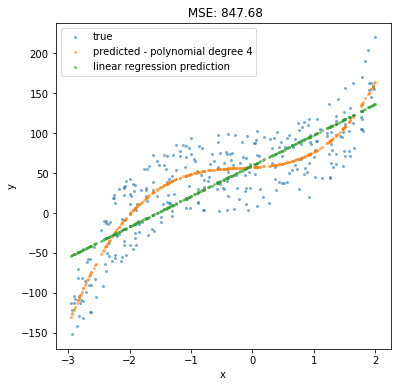

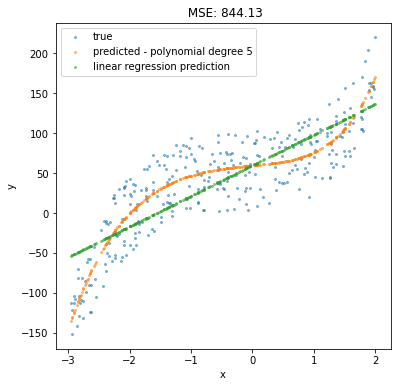

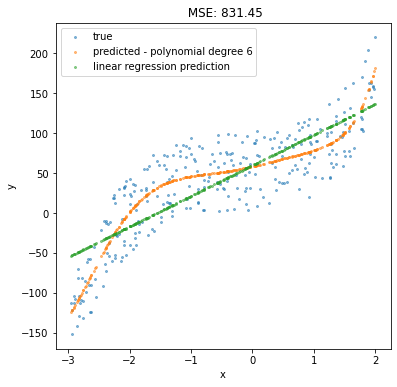

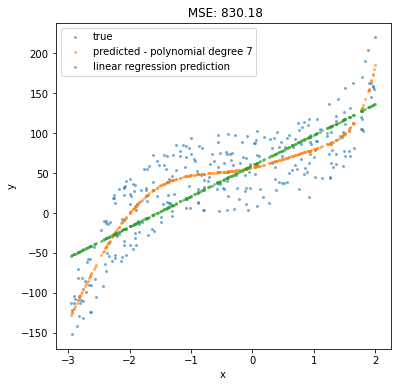

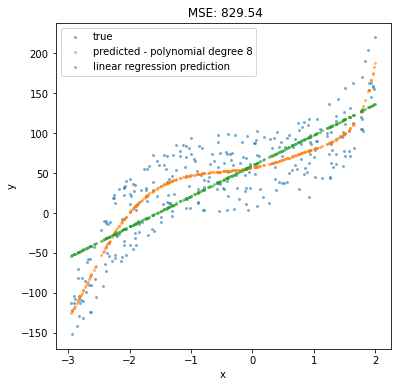

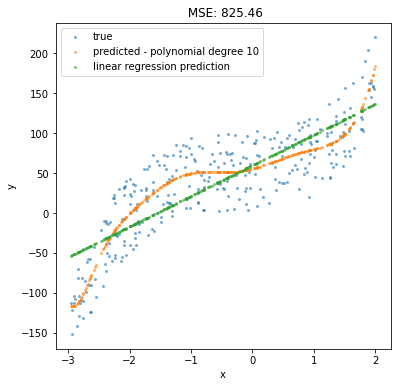

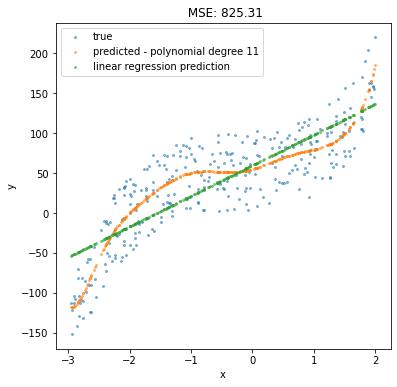

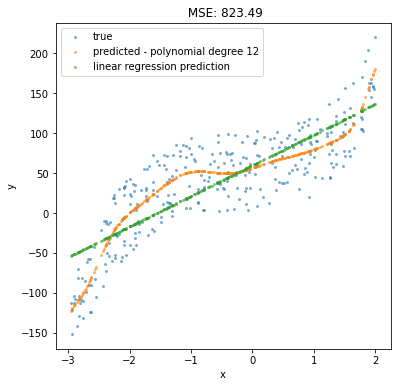

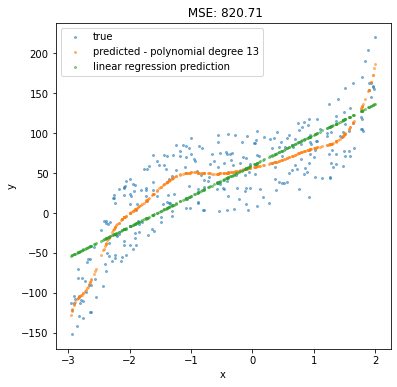

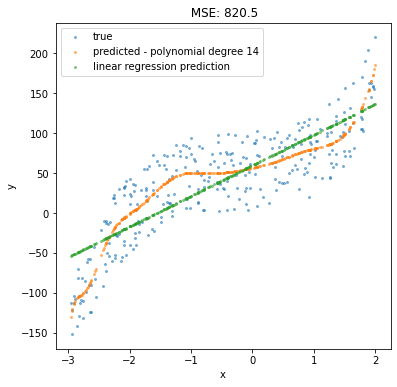

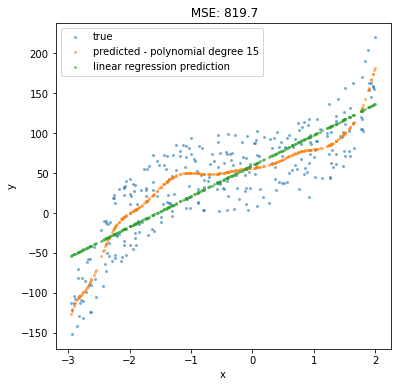

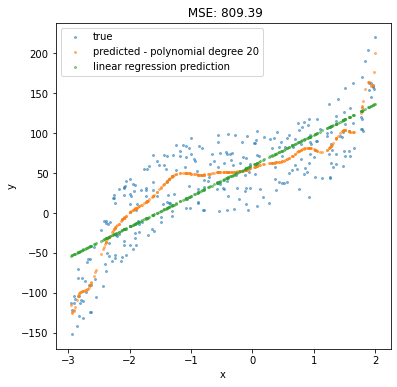

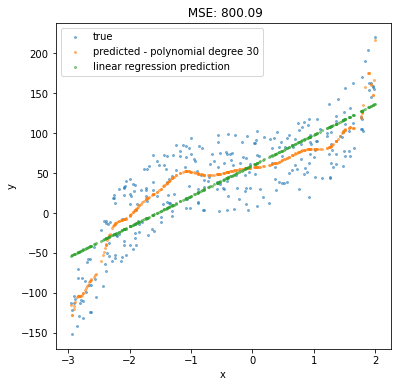

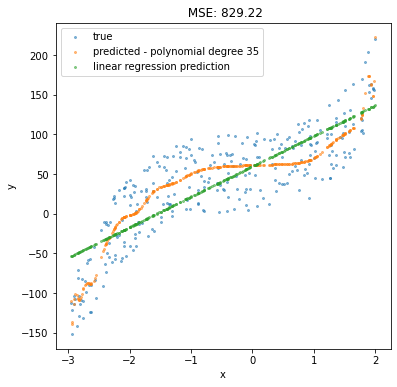

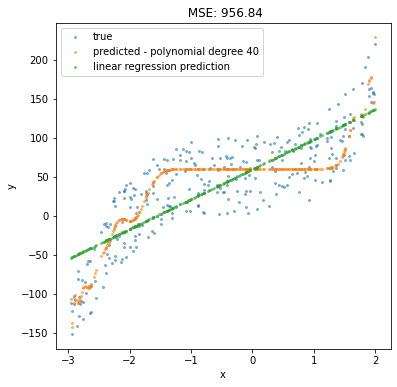

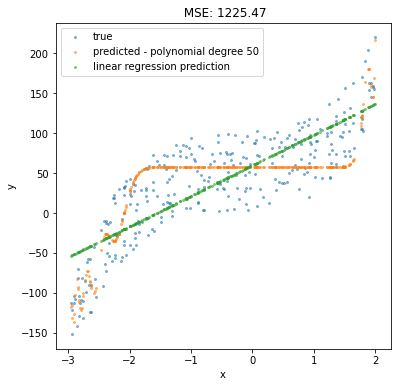

In [5]:
degrees = [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 20, 30, 35, 40, 50]
for degree in degrees:
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_model.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    lin_reg.fit(x.reshape(-1,1), y)
    y_pred_reg = lin_reg.predict(x.reshape(-1,1))
    
    plt.figure(figsize=(6,6))
    plt.scatter(x,y, s=4, alpha =0.5, label = 'true')
    plt.scatter(x, y_pred, s = 4, alpha = 0.5, label= f'predicted - polynomial degree {degree}')
    plt.scatter(x, y_pred_reg, s = 4, alpha = 0.5, label= 'linear regression prediction')
    plt.title(f' MSE: {round(mean_squared_error(y, y_pred), 2)}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend();

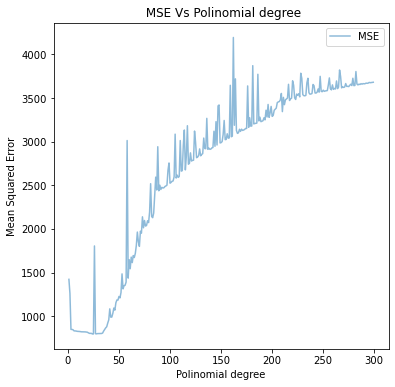

In [6]:
# Now we will plot the relationship between the degree (polinomial feature parameter) and mse
degrees = np.arange(1, 300, 1)
mse = []
for degree in degrees:
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_model.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    mse.append(round(mean_squared_error(y, y_pred), 2))

plt.figure(figsize=(6,6))
plt.plot(degrees,mse, alpha =0.5, label = 'MSE')
plt.title(' MSE Vs Polinomial degree')
plt.xlabel('Polinomial degree')
plt.ylabel('Mean Squared Error')
plt.legend();

In [7]:
# We will try for less complex equation

In [8]:
m=300
x = 5 * np.random.rand(m) - 3
y = 8*x**2 + 3*x + 3 + 10*np.random.rand(m)

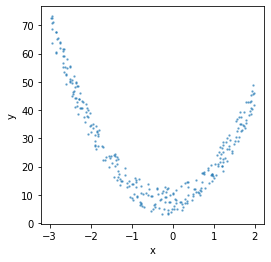

In [9]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, s=2, alpha =0.5)
plt.xlabel('x')
plt.ylabel('y');

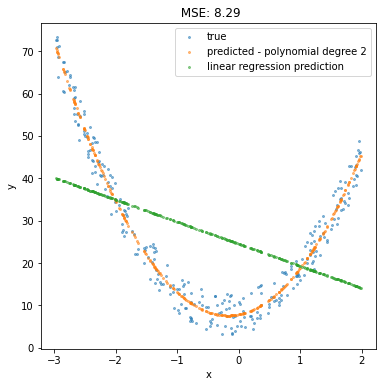

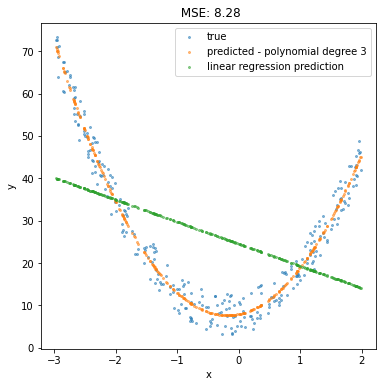

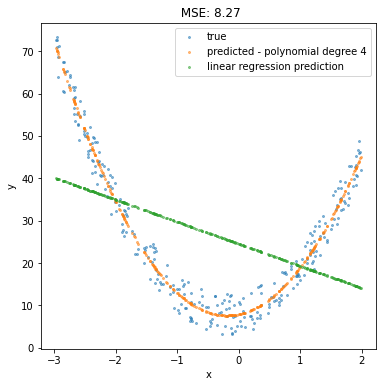

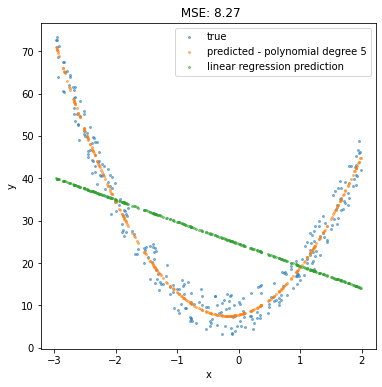

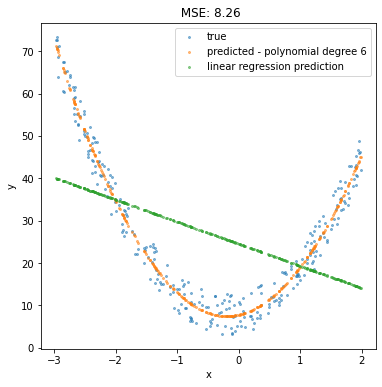

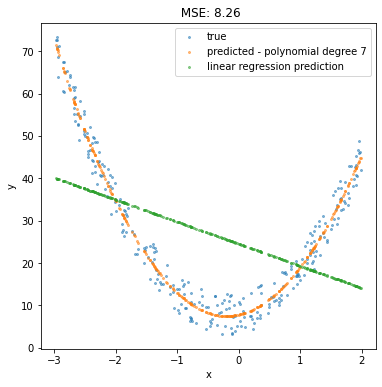

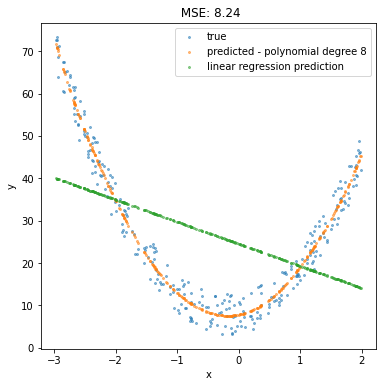

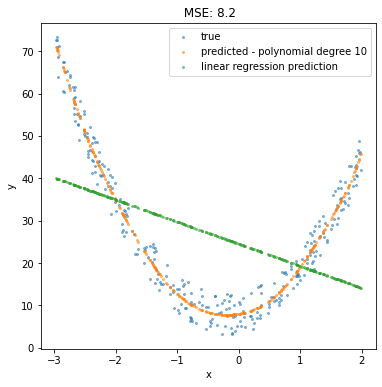

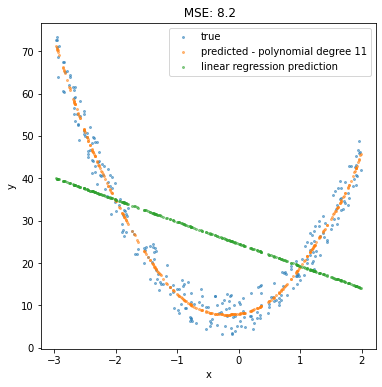

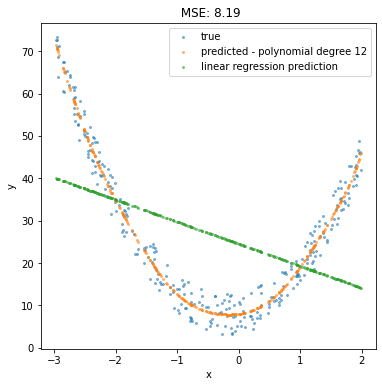

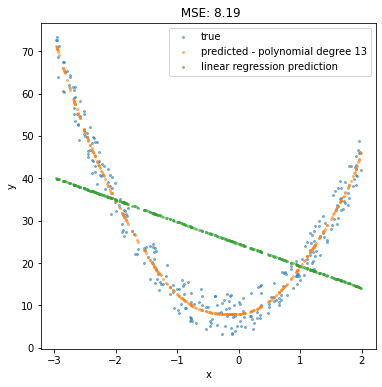

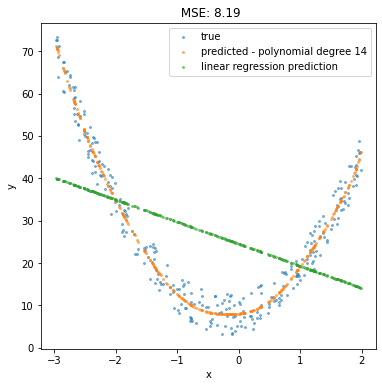

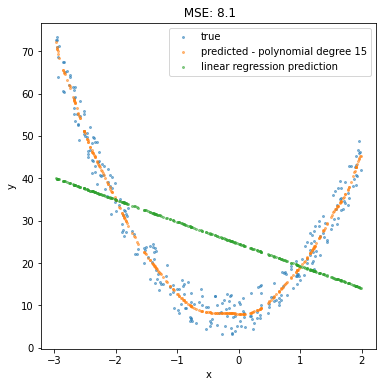

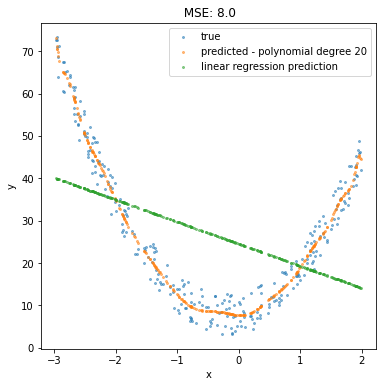

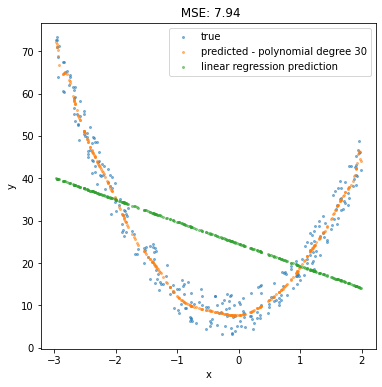

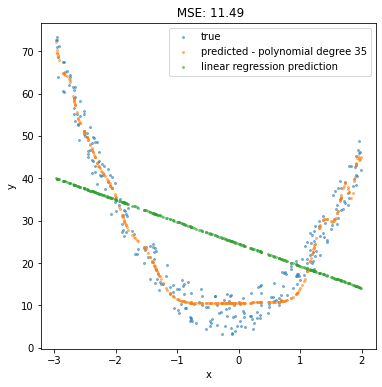

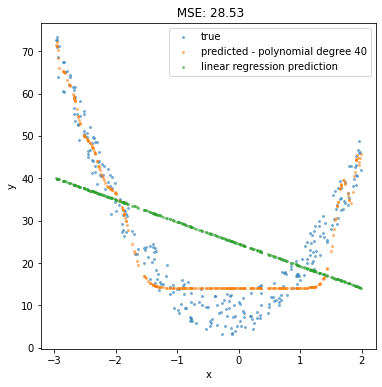

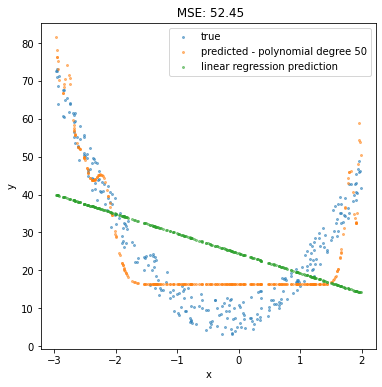

In [10]:
degrees = [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 20, 30, 35, 40, 50]
for degree in degrees:
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_model.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    lin_reg.fit(x.reshape(-1,1), y)
    y_pred_reg = lin_reg.predict(x.reshape(-1,1))
    
    plt.figure(figsize=(6,6))
    plt.scatter(x,y, s=4, alpha =0.5, label = 'true')
    plt.scatter(x, y_pred, s = 4, alpha = 0.5, label= f'predicted - polynomial degree {degree}')
    plt.scatter(x, y_pred_reg, s = 4, alpha = 0.5, label= 'linear regression prediction')
    plt.title(f' MSE: {round(mean_squared_error(y, y_pred), 2)}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend();

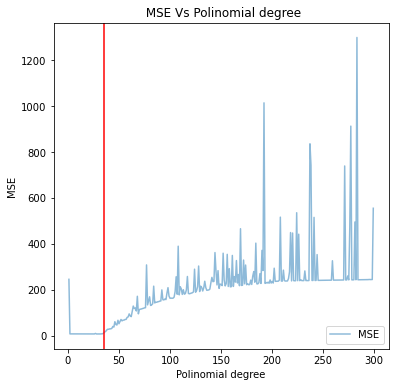

In [11]:
# with huge polynomial degree parameter the error dramatically increases
degrees = np.arange(1, 300, 1)
mse = []
for degree in degrees:
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_model.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    mse.append(round(mean_squared_error(y, y_pred), 2))

plt.figure(figsize=(6,6))
plt.plot(degrees,mse, alpha =0.5, label = 'MSE')
plt.title(' MSE Vs Polinomial degree')
plt.xlabel('Polinomial degree')
plt.ylabel('MSE')
plt.axvline(35, c = 'r')
plt.legend();